In [1]:
from photometry import Spot, ImageData, AperturePhotometry
import numpy as np
import matplotlib.pyplot as plt

### ImageData Module

In [2]:
repo = "embargo_new"
collections = ["LSSTComCam/nightlyValidation"]
instrument='LSSTComCam'
exposure=2024121000075
dataId={"exposure":exposure,"detector":7}
datasetType='postISRCCD'
idata = ImageData(repo=repo)

In [3]:
idata.instrument= instrument
idata.dataId = dataId
idata.datasetType = datasetType
idata.collections = collections
datasets = idata.get_datasets()
# can also access with idata.datasets

One dataset found


In [4]:
image = idata.get_image() #If no dataset passed, it will try to detect one and take it
# can also access with idata.image

One dataset found


In [5]:
#One can also pass a dataset one ref only
idata.dataId = {"exposure":2024121000103,"detector":7}
dataset_2 = idata.get_datasets()
image_2 = idata.get_image(dataset=dataset_2[0])

One dataset found


In [6]:
# We can also use defered datasets
import lsst.daf.butler as daf_butler
butler = daf_butler.Butler(repo, collections=collections)
exposure_handle = daf_butler.DeferredDatasetHandle(butler, datasets[0], None)
idata = ImageData(exposure_handle=exposure_handle, repo=repo)
image = idata.get_image_from_handle()

### Spot Module

In [63]:
sp = Spot(mask_size = 100) #We give the size of the mask pinhole, it remains an indicator only

In [8]:
# Load the image we want

In [9]:
idata = ImageData(exposure_handle, repo=repo)
exposure_handle = daf_butler.DeferredDatasetHandle(butler, datasets[0], None)
image = idata.get_image()

One dataset found


In [65]:
#One can get the estimated area of the spot on the focal plane
sp.get_mask_size()
print(sp.mask_area_fp_px)

20704.262314169875


In [66]:
sp.mask_size_fp_px

162.36220472440942

In [47]:
found_spot = sp.find_spot(idata.img.getImage(), threshold_adu=1000,minarea=100) #Need to pass an afw image*
print(found_spot)

[]


In [39]:
np.std(idata.img.getImage().array)

np.float32(35.59327)

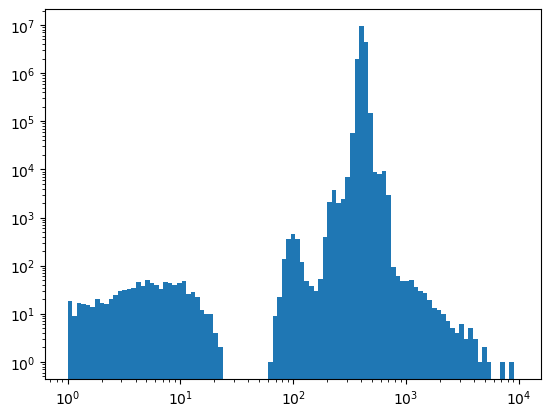

In [30]:
plt.hist(idata.img.getImage().array.ravel(),bins=np.logspace(0,4,100))
plt.yscale("log")
plt.xscale("log")

In [51]:
threshold_adu_min=100
threshold_adu_max=1e4
bins = np.logspace(np.log10(threshold_adu_max), np.log10(threshold_adu_min),5)
print(bins)

[10000.          3162.27766017  1000.           316.22776602
   100.        ]


In [54]:
np.median(idata.img.getImage().array)

np.float32(410.3429)

In [52]:
np.percentile(idata.img.getImage().array,75)

np.float32(425.3174)

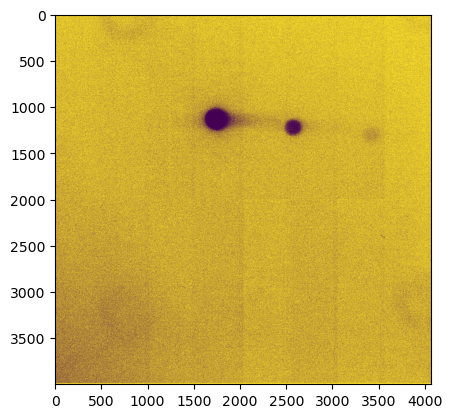

In [53]:
image= idata.img.getImage().array
plt.imshow(image<425.3)

In [20]:
np.mean(idata.img.getImage())

AttributeError: type object 'numpy.float32' has no attribute 'type'

In [12]:
found_spot.sort(key=lambda x: x.getArea(), reverse=True)

In [45]:
iteratively_found_spot = sp.find_spot_iteratively(idata.img.getImage(), threshold_adu_min=10,threshold_adu_max=1000,minarea=250)
print(iteratively_found_spot)

[1803981 peaks, area=16268240, centroid=(2035.61, 1999.88)]


In [44]:
sp.get_mask_size()
sp.mask_size_fp_px

243.5433070866142

In [14]:
sp.get_spot_information() # Get the information from the spot, if no spot passed, will use the last ones detected 
print(sp.centroid, sp.x, sp.y, sp.radius)

(2035.6, 1999.9) 2035.6089484172842 1999.8777821694296 2275.5969816315433


In [15]:
#Be carefull here, if multiple spots, only take the first one
sp.get_spot_information(spot = found_spot[0])
print(sp.centroid, sp.x, sp.y, sp.radius)

NameError: name 'found_spot' is not defined

In [67]:
plt.imshow(idata.img.getImage().array,vmin=100,vmax=1000)
plt.scatter(sp.x,sp.y,c='r',marker='+')
plt.ylim(0,4000)

AttributeError: 'ImageData' object has no attribute 'img'

In [16]:
# We can use the previously determined area
minarea = int(sp.mask_area_fp_px*.9)
found_spot = sp.find_spot(idata.img.getImage(), threshold_adu=100,minarea=minarea)
print(found_spot)
sp.get_spot_information(spot = found_spot[0])
print(sp.centroid, sp.x, sp.y, sp.radius)

[13666 peaks, area=171278, centroid=(1670.27, 2680.94)]
(1670.3, 2680.9) 1670.2653580728406 2680.940710423989 233.4940699156775


In [17]:
best_spot = sp.find_and_get_best_spot(idata.img.getImage())

In [18]:
best_spot

3498 peaks, area=59341, centroid=(1668.21, 2685.81)

In [19]:
sp.x, sp.y, sp.radius

(1668.2076810299793, 2685.808732579498, np.float64(137.43662887320951))

In [20]:
sp.x, sp.y, sp.radius

(1668.2076810299793, 2685.808732579498, np.float64(137.43662887320951))

#### Known spots

In [21]:
x, y, radius = sp.x, sp.y, sp.radius #Using previously found spot

In [22]:
sp = Spot(x=x ,y=y , radius=radius) #We give the size of the mask pinhole, it remains an indicator only

### AperturePhotometry module

It is mandatory to use a spot and an image

In [68]:
repo = "embargo"
#collections = ["u/amouroux/eo_cbp_spot_measurements_forced_photometry_20241210_cbp_filter_scan_white_w_2025_13/20250422T203805Z"]
#collections = ["u/amouroux/eo_cbp_spot_measurements_forced_photometry_20241210_cbp_filter_scan_r_w_2025_13/20250422T084442Z"]
collections = ["LSSTCam/raw/all"]
instrument='LSSTCam'
exposure=2025050300118
dataId={"exposure":exposure,"detector":32}
datasetType='raw'
idata = ImageData(repo=repo)
idata.instrument= instrument
idata.dataId = dataId
idata.datasetType = datasetType
idata.collections = collections
datasets = idata.get_datasets()

One dataset found


In [69]:
idata.get_image()

One dataset found


array([[25313., 25320., 25319., ..., 25395., 21755., 25535.],
       [25316., 25316., 25317., ..., 25413., 21751., 25533.],
       [25331., 25314., 25330., ..., 25411., 21755., 25534.],
       ...,
       [25183., 25185., 25182., ..., 26134., 25008., 25509.],
       [25185., 25184., 25182., ..., 26138., 25004., 25510.],
       [25186., 25187., 25187., ..., 26130., 25000., 25513.]],
      dtype=float32)

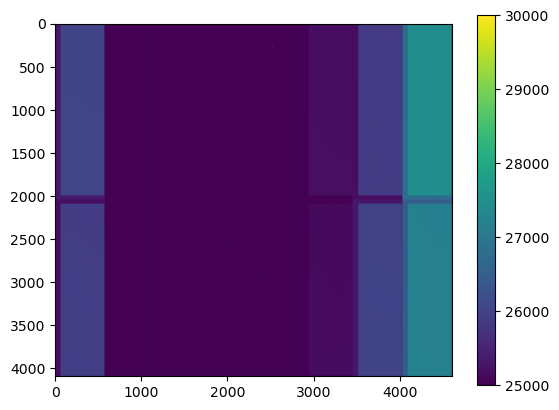

In [74]:
plt.imshow(idata.image,vmin=25000,vmax=30000)
#plt.scatter()
plt.colorbar()

In [5]:
sp = Spot(x=2155, y=2628 , radius=149)
ap = AperturePhotometry(image=idata, spot=sp)

In [8]:
np.mean(ap.image), np.std(ap.image)

(np.float32(36.429935), np.float32(15.453747))

In [12]:
np.mean(ap.image[ap.image<(np.mean(ap.image) + 3*np.std(ap.image))]), np.std(ap.image[ap.image<(np.mean(ap.image) + 3*np.std(ap.image))])

(np.float32(35.682934), np.float32(8.268939))

In [13]:
background_2d_thrshld = ap.get_2d_background_threshold()

In [14]:
background_2d_thrshld.mean(), background_2d_thrshld.std()

(np.float32(35.42986), np.float32(0.00037765235))

In [18]:
ap.Spot.centroid

(2155, 2628)

In [44]:
bkg_aperture = ap.generate_aperture(centroid=ap.Spot.centroid, radius=600)
background_2d_ap = ap.get_2d_background_aperture(aperture = bkg_aperture)

In [20]:
mean_bkg = ap.get_mean_background()
print(mean_bkg)

35.682934


In [45]:
mask = np.zeros((ap.image.shape[0], ap.image.shape[1]), dtype=bool)

In [46]:
mask |= bkg_aperture.to_mask(method='center').to_image((ap.image.shape[0], ap.image.shape[1])).astype(bool)

In [27]:
from photutils.background import Background2D

In [47]:
bkg = Background2D(ap.image, (int(len(ap.image)/10), int(len(ap.image[0])/10)), mask=mask, exclude_percentile=50.0)

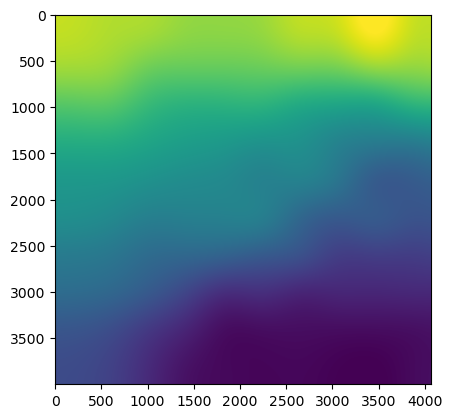

In [48]:
plt.imshow(bkg.background)

In [49]:
aperture = ap.generate_aperture(ap.Spot.centroid, radius=200)
photometry_bkg = ap.do_aperture_photometry(image=bkg.background, aperture=aperture)

In [36]:
photometry_bkg/(np.pi*(200**2))

np.float64(33.777154524192554)

In [95]:
dark_exp_bkg = ap.get_dark_background()

IndexError: index 0 is out of bounds for axis 0 with size 0

In [50]:
substracted_background_image = ap.get_substracted_background_image(background = bkg.background)

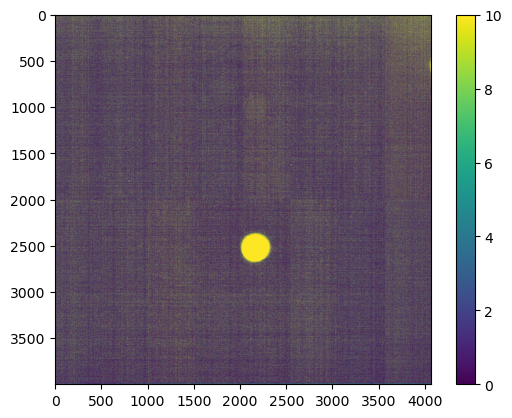

In [53]:
plt.imshow(substracted_background_image,vmin=0,vmax=10)
plt.colorbar()

In [54]:
aperture = ap.generate_aperture(ap.Spot.centroid, radius=200)
photometry = ap.do_aperture_photometry(image=substracted_background_image, aperture=aperture)
print(photometry)

11746941.82972863


In [55]:
forced_photometry = ap.do_forced_aperture_photometry(centroid=ap.Spot.centroid, radius=200)
print(forced_photometry)

11555198.898963466


In [58]:
plt.imshow(ap.substracted_background_image,vmin=40,vmax=50)

AttributeError: 'AperturePhotometry' object has no attribute 'substracted_background_image'

In [88]:
ap.background_mean

np.float64(35.457481384277344)

In [89]:
ap.background_stats.std

np.float64(0.0)

In [59]:
from photutils.aperture import CircularAperture
from photutils.background import Background2D

In [60]:
background_aperture = CircularAperture(ap.Spot.centroid, r=600)

In [61]:
background = ap.get_2d_background_aperture(aperture=background_aperture)

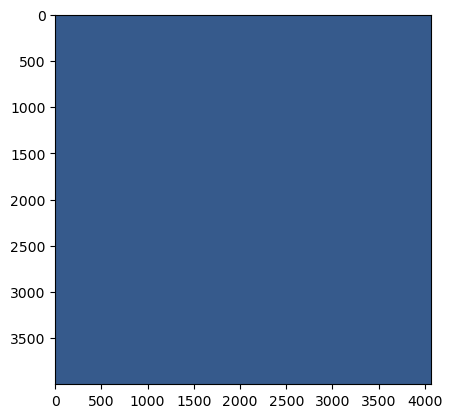

In [62]:
plt.imshow(background,vmin=10,vmax=100)

In [47]:
mask = np.zeros((ap.image.shape[0], ap.image.shape[1]), dtype=bool)

In [48]:
mask |= background_aperture.to_mask(method='center').to_image((ap.image.shape[0], ap.image.shape[1])).astype(bool)

In [57]:
bkg = Background2D(ap.image, (int(len(ap.image)), int(len(ap.image[0]))), mask=mask, exclude_percentile=25.0)

In [65]:
bkg.background[bkg.background!=44.909843]

array([], dtype=float32)

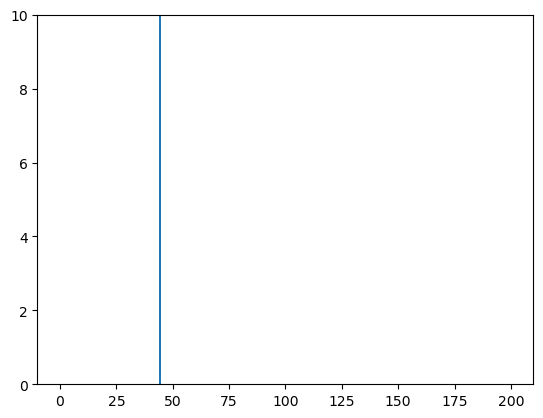

In [64]:
plt.hist(bkg.background.ravel(),bins=np.linspace(0,200,201))
plt.ylim(0,10)
plt.show()

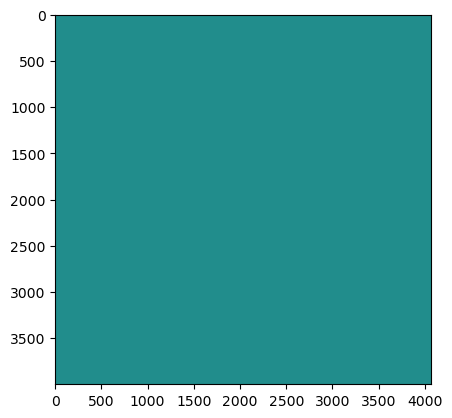

In [59]:
plt.imshow(bkg.background,vmin=40,vmax=50)

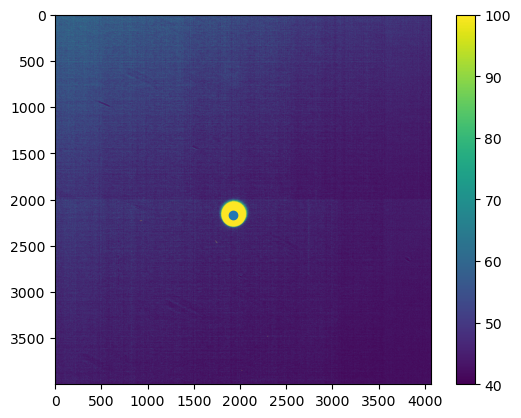

In [60]:
plt.scatter(1923,2168)
plt.imshow(ap.image,vmin=40,vmax=100)
plt.colorbar()

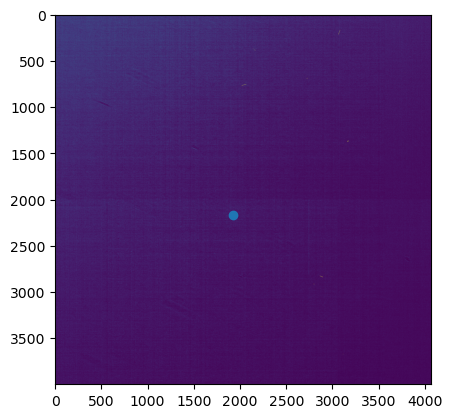

In [227]:
plt.imshow(ap.subtracted_background_image,vmin=-5,vmax=100)
plt.scatter(1923,2168)

In [135]:
np.mean(ap.image)

np.float32(10.923071)

In [21]:
from astropy.table import Table 

In [22]:
a = Table.read("/sdf/group/rubin/user/amouroux/DATA/CBP/Comcamspotmeasurement/test_eo_task/20241210_200.fits")

In [23]:
a

id,coord_ra,coord_dec,parent,detector,exposure,x,y,x_fp,y_fp,radius,signal,bkg_mean,bkg_std,footprint
,rad,rad,,,,,,,,,,,,
int64,float64,float64,int64,bytes10,int64,float32,float32,float32,float32,float32,float32,float32,float32,int32
1,--,--,0,R22_S11,0,1853.0692,2581.1003,-1.8343077,5.8060026,122.516205,26145666.0,3.4761868,0.0,0
2,--,--,0,R22_S10,0,1727.8605,2393.0173,-45.336395,3.9251745,121.77088,25607020.0,3.2762313,0.0,0
3,--,--,0,R22_S02,0,2153.1675,2644.2354,43.416676,-35.812645,122.37973,26495380.0,4.0176535,0.0,0
4,--,--,0,R22_S22,0,1786.7782,2883.3352,39.75278,51.078354,121.59954,24664092.0,3.9083252,0.0,0
5,--,--,0,R22_S01,0,2040.9208,2457.2803,0.044207193,-37.682198,123.30737,27809480.0,4.019445,0.0,0
